# Importing pandas and tensor flow to read csv file and make neural network architecture

In [13]:
import pandas as pd
import tensorflow as tf

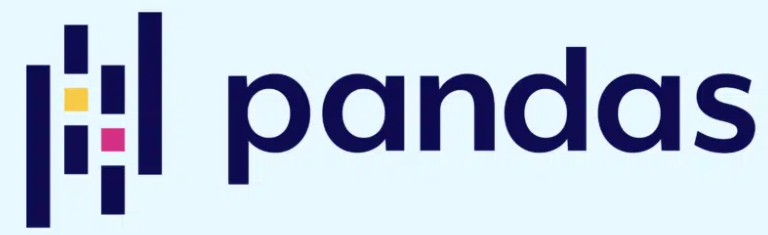

Pandas is a library of the Python programming language, entirely dedicated to Data Science. Find out what this tool is used for, and why it is essential for Data Scientists.

Created in 1991, Python is the most popular programming language for data analysis and Machine Learning. Several advantages explain its success with Data Scientists.

First of all, it is a very easy-to-use language. Even a beginner can quickly produce programs thanks to its simple and intuitive syntax.

This language federates a vast community, having created many tools for Data Science. There are for example tools for Data Visualization such as Seaborn and Matplotlib, and software libraries such as NumPy. One of these libraries is Pandas, designed for data manipulation and analysis.

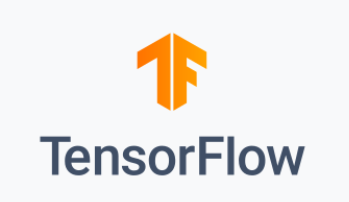

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

TensorFlow was developed by the Google Brain team for internal Google use in research and production.The initial version was released under the Apache License 2.0 in 2015. Google released the updated version of TensorFlow, named TensorFlow 2.0, in September 2019.

TensorFlow can be used in a wide variety of programming languages, including Python, JavaScript, C++, and Java.This flexibility lends itself to a range of applications in many different sectors.

# Assigning dataset and reading it with pandas

In [14]:
jobdata = r"C:\Users\jason\Downloads\data job posts.csv"

In [15]:
df = pd.read_csv(jobdata,error_bad_lines=False)

C:\Users\jason\AppData\Local\Temp\ipykernel_11716\837224130.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(jobdata,error_bad_lines=False)


# Below is sample dataset of job post description, company and several other labels. It contains 19000 rows and 24 labels. For the training, we will only use jobpost label

In [16]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


# Assignning jobpost column only for the data set then remove unnecesary element in the dataset

In [17]:
dataset = df['jobpost']

replace_str = ['\r', '\n', 'TITLE:',',','"','.',':','/','(',')',';','','-','1','2','3','4',
               '5','6','7','8','9','0','@','Armenia','#','$','+','%','&'
               ,'!','*','?','<','>','_','[',']','or','AA','AAA','AAAA','AAAAS','aaas','AAB','AAFF','AAFPC','aafpc','and','Yerevan' ]
replacement = ''

for string in replace_str:
    dataset = dataset.str.replace(string, replacement)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\jason\AppData\Local\Temp\ipykernel_11716\3071534676.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset = dataset.str.replace(string, replacement)


# Use only words with more than two characters because words with 2 characters or below most likely are stopwords

In [18]:
dataset_list = dataset.tolist()
combined_keywords = ' '.join(dataset_list)
myKeywords = [word.lower() for word in combined_keywords.split() if len(word) > 2]
new_list = [' '.join(sublist) for sublist in [myKeywords[i:i+3] for i in range(0, len(myKeywords), 3)]]
print(myKeywords[0:1000])

['ameria', 'investment', 'consulting', 'companyjob', 'chief', 'financial', 'officerposition', 'location', 'job', 'description', 'ameria', 'investment', 'consulting', 'company', 'seeking', 'achief', 'financial', 'officer', 'this', 'position', 'manages', 'the', "company's", 'fiscal', 'administrative', 'functions', 'provides', 'highly', 'responsible', 'technicallycomplex', 'staff', 'assistance', 'the', 'executive', 'direct', 'the', 'perfmedrequires', 'high', 'level', 'technical', 'proficiency', 'financial', 'management', 'investment', 'management', 'well', 'management', 'supervisy', 'administrative', 'skillsjob', 'responsibilities', 'supervises', 'financial', 'management', 'administrative', 'staff', 'includingassigning', 'responsibilities', 'reviewing', "employees'", 'processes', 'products', 'counseling', 'employees', 'giving', 'perfmance', 'evaluations', 'recommending', 'disciplinary', 'action', 'serves', 'member', 'management', 'team', 'participating', 'both', 'strategic', 'operational'

In [ ]:
print(new_list[0:1000])

# After the preproccesing, there will be two element of the data set. First is the keywords, or the total vocabulary, and second is phrase which refer to "newlist"

In [19]:
print(len(myKeywords))
print(len(new_list))

4651855
1550619


In [20]:
corpus = new_list[0:6000]
words = myKeywords[0:9000]

# generating dataset

The idea of training word to vector model is to do fake model training. So we train the model to predict upcoming next word. So for example if we have phrase "The Mighty King". We want to input word "the" and word "mighty" and we expect our model to predict word "king". If we done this with many iteration and many different phrases, we can get the vector of each word. Further explanation will be given in skip gram method explanation. 

In [21]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [22]:
df = pd.DataFrame(data, columns = ['input', 'label'])

In [23]:
df.head(20)

,input,label
0,ameria,investment
1,ameria,consulting
2,investment,ameria
3,investment,consulting
4,consulting,ameria
5,consulting,investment
6,companyjob,chief
7,companyjob,financial
8,chief,companyjob
9,chief,financial


In [24]:
df = df[0:9000]
print(df[0:9000])

                                    input                                label
0                                  ameria                           investment
1                                  ameria                           consulting
2                              investment                               ameria
3                              investment                           consulting
4                              consulting                               ameria
5                              consulting                           investment
6                              companyjob                                chief
7                              companyjob                            financial
8                                   chief                           companyjob
9                                   chief                            financial
10                              financial                           companyjob
11                              financial           

In [25]:
df.shape

(9000, 2)

# skip gram method

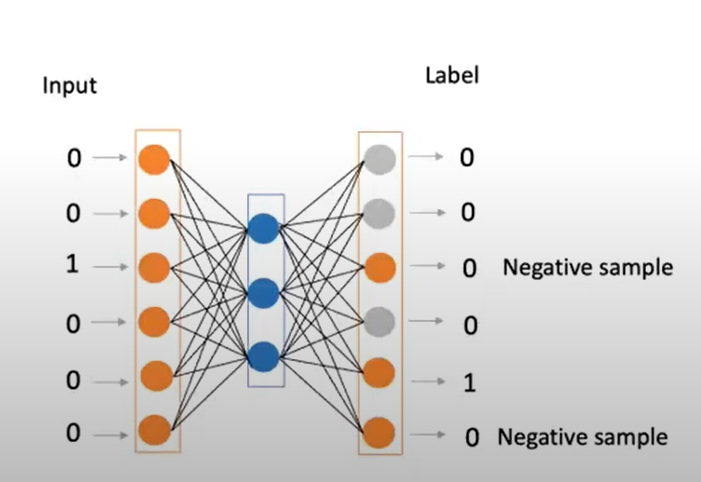

After generating the data set that we assigned as 'df' in above code, we will do one hot encoding to each input word and the length of encoding matirx is the total length of the vocabulary. One hot matrix is relatively not cost effective because of the memory usage, therefore we implement sparse matrix. 

The neural network is pretty simple. We take the input layer from the sparse matrix that we made before and then we define the hidden layer that we call embedding layer and from the hidden layer we will use softmax activation function to get the output vector. 

The weight and biases from the blue neuron (embedding layer) to output layer is actually the vector that we need. Implementing fake training method will give us the side product which is the vector. Using 3 neuron in embedding layer will result in 3 dimentional vector for each word. So the relation is n-neuron in embedding layer resulting to n-dimentional vector. 

After each forward propagation training, we want to compare the output layer prediction with the actual value of the one hot encoding word. We then calculate the loss function do gradient descent algorithm to minimize the loss. By doing this for many iteration, we can get the vector that we need it. 

Each of word in vocabulary will then express by n-dimentional matrix. This training method also introduce a semantic relation between words in vocabulary. This happen because words that human spoke is being organized in such a way that a word is most likely to be followed by another word (for example : word "human" in work field most likely to be followed by "resources" or "development" or etc). So, this kind of relation in uncounciouslly train the model the be predict that word "resource" have simillar characteristic of vector with "development". 

To simplified the proof of simillar vector, we can use cossine simillarity to find the angle between two vector to further decrease the calculation stress. 

# try with small data

In [26]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from scipy import sparse

# Function to convert numbers to one-hot vectors
def to_one_hot_encoding(data_point_index, one_hot_dim):
    one_hot_encoding = np.zeros(one_hot_dim)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

# Define the batch size
batch_size = 1

# Define the total number of data points
total_data_points = 10

# Get the maximum index value for one-hot encoding
one_hot_dim = len(words)

# Initialize empty lists for batched data
batched_X = []
batched_Y = []

for i in range(0, total_data_points, batch_size):
    # Get a batch of data points
    batch_X = df['input'][i:i+batch_size]
    batch_Y = df['label'][i:i+batch_size]

    # Convert the batched data points to one-hot encoding
    X = sparse.vstack([sparse.csr_matrix(to_one_hot_encoding(word2int[x], one_hot_dim)) for x in batch_X])
    Y = sparse.vstack([sparse.csr_matrix(to_one_hot_encoding(word2int[y], one_hot_dim)) for y in batch_Y])

    # Append the batched data to the respective lists
    batched_X.append(X)
    batched_Y.append(Y)

# Convert the batched data to numpy arrays
X_train = sparse.vstack(batched_X).toarray()
Y_train = sparse.vstack(batched_Y).toarray()

# Define the model architecture
ONE_HOT_DIM = len(words)
EMBEDDING_DIM = 15

x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x, W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

# Define the loss function and training operation
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Instructions for updating:
non-resource variables are not supported in the long term


# Training the model and trying to utillizing GPU if any

In [27]:
gpu_device = '/gpu:0'

# Create a TensorFlow session and configure it to use the specified GPU device
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = '0'  # Assuming GPU index 0 corresponds to your GeForce GTX 1650
sess = tf.compat.v1.Session(config=config)

# Initialize the variables
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

iteration = 2000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    with tf.device(gpu_device):
        sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    loss_value = sess.run(loss, feed_dict={x: X_train, y_label: Y_train})
    print('iteration', i, 'loss is:', loss_value)

iteration 0 loss is: 14.701251
iteration 1 loss is: 14.491849
iteration 2 loss is: 14.291855
iteration 3 loss is: 14.096637
iteration 4 loss is: 13.905629
iteration 5 loss is: 13.71863
iteration 6 loss is: 13.535492
iteration 7 loss is: 13.356076
iteration 8 loss is: 13.180252
iteration 9 loss is: 13.007898
iteration 10 loss is: 12.838903
iteration 11 loss is: 12.673155
iteration 12 loss is: 12.510552
iteration 13 loss is: 12.350997
iteration 14 loss is: 12.194397
iteration 15 loss is: 12.040662
iteration 16 loss is: 11.889708
iteration 17 loss is: 11.741451
iteration 18 loss is: 11.5958185
iteration 19 loss is: 11.452731
iteration 20 loss is: 11.312118
iteration 21 loss is: 11.173911
iteration 22 loss is: 11.038042
iteration 23 loss is: 10.904448
iteration 24 loss is: 10.773066
iteration 25 loss is: 10.643837
iteration 26 loss is: 10.516704
iteration 27 loss is: 10.391611
iteration 28 loss is: 10.268506
iteration 29 loss is: 10.147337
iteration 30 loss is: 10.028055
iteration 31 loss 

iteration 326 loss is: 0.7367401
iteration 327 loss is: 0.7364255
iteration 328 loss is: 0.7361153
iteration 329 loss is: 0.7358092
iteration 330 loss is: 0.73550737
iteration 331 loss is: 0.7352096
iteration 332 loss is: 0.73491573
iteration 333 loss is: 0.73462594
iteration 334 loss is: 0.73433995
iteration 335 loss is: 0.73405766
iteration 336 loss is: 0.73377925
iteration 337 loss is: 0.7335041
iteration 338 loss is: 0.7332328
iteration 339 loss is: 0.7329649
iteration 340 loss is: 0.73270047
iteration 341 loss is: 0.73243934
iteration 342 loss is: 0.73218143
iteration 343 loss is: 0.7319269
iteration 344 loss is: 0.73167545
iteration 345 loss is: 0.7314271
iteration 346 loss is: 0.731182
iteration 347 loss is: 0.73093975
iteration 348 loss is: 0.7307004
iteration 349 loss is: 0.7304641
iteration 350 loss is: 0.73023045
iteration 351 loss is: 0.72999966
iteration 352 loss is: 0.7297715
iteration 353 loss is: 0.7295464
iteration 354 loss is: 0.72932374
iteration 355 loss is: 0.72910

iteration 584 loss is: 0.7078792
iteration 585 loss is: 0.7078405
iteration 586 loss is: 0.70780194
iteration 587 loss is: 0.70776355
iteration 588 loss is: 0.7077254
iteration 589 loss is: 0.7076875
iteration 590 loss is: 0.7076497
iteration 591 loss is: 0.70761216
iteration 592 loss is: 0.70757484
iteration 593 loss is: 0.7075376
iteration 594 loss is: 0.7075006
iteration 595 loss is: 0.7074636
iteration 596 loss is: 0.7074271
iteration 597 loss is: 0.70739067
iteration 598 loss is: 0.70735437
iteration 599 loss is: 0.7073182
iteration 600 loss is: 0.7072824
iteration 601 loss is: 0.7072466
iteration 602 loss is: 0.707211
iteration 603 loss is: 0.7071756
iteration 604 loss is: 0.7071404
iteration 605 loss is: 0.70710546
iteration 606 loss is: 0.7070705
iteration 607 loss is: 0.7070357
iteration 608 loss is: 0.7070013
iteration 609 loss is: 0.7069668
iteration 610 loss is: 0.7069327
iteration 611 loss is: 0.7068986
iteration 612 loss is: 0.7068647
iteration 613 loss is: 0.70683104
ite

iteration 847 loss is: 0.70179516
iteration 848 loss is: 0.7017814
iteration 849 loss is: 0.70176774
iteration 850 loss is: 0.70175415
iteration 851 loss is: 0.7017405
iteration 852 loss is: 0.701727
iteration 853 loss is: 0.70171344
iteration 854 loss is: 0.7017
iteration 855 loss is: 0.70168656
iteration 856 loss is: 0.70167315
iteration 857 loss is: 0.7016598
iteration 858 loss is: 0.7016465
iteration 859 loss is: 0.70163333
iteration 860 loss is: 0.70162
iteration 861 loss is: 0.70160687
iteration 862 loss is: 0.7015937
iteration 863 loss is: 0.7015804
iteration 864 loss is: 0.7015675
iteration 865 loss is: 0.7015544
iteration 866 loss is: 0.7015415
iteration 867 loss is: 0.70152843
iteration 868 loss is: 0.7015156
iteration 869 loss is: 0.7015027
iteration 870 loss is: 0.7014899
iteration 871 loss is: 0.70147705
iteration 872 loss is: 0.70146435
iteration 873 loss is: 0.70145166
iteration 874 loss is: 0.70143896
iteration 875 loss is: 0.7014264
iteration 876 loss is: 0.7014137
ite

iteration 1107 loss is: 0.6992506
iteration 1108 loss is: 0.6992436
iteration 1109 loss is: 0.69923663
iteration 1110 loss is: 0.6992297
iteration 1111 loss is: 0.69922274
iteration 1112 loss is: 0.6992158
iteration 1113 loss is: 0.6992089
iteration 1114 loss is: 0.6992022
iteration 1115 loss is: 0.69919527
iteration 1116 loss is: 0.6991885
iteration 1117 loss is: 0.6991816
iteration 1118 loss is: 0.6991749
iteration 1119 loss is: 0.6991681
iteration 1120 loss is: 0.6991612
iteration 1121 loss is: 0.6991545
iteration 1122 loss is: 0.69914776
iteration 1123 loss is: 0.699141
iteration 1124 loss is: 0.6991343
iteration 1125 loss is: 0.69912755
iteration 1126 loss is: 0.69912094
iteration 1127 loss is: 0.6991142
iteration 1128 loss is: 0.69910765
iteration 1129 loss is: 0.699101
iteration 1130 loss is: 0.69909436
iteration 1131 loss is: 0.6990878
iteration 1132 loss is: 0.6990811
iteration 1133 loss is: 0.6990746
iteration 1134 loss is: 0.6990681
iteration 1135 loss is: 0.6990615
iteratio

iteration 1363 loss is: 0.69786346
iteration 1364 loss is: 0.69785917
iteration 1365 loss is: 0.697855
iteration 1366 loss is: 0.6978509
iteration 1367 loss is: 0.69784653
iteration 1368 loss is: 0.6978425
iteration 1369 loss is: 0.6978383
iteration 1370 loss is: 0.69783413
iteration 1371 loss is: 0.6978299
iteration 1372 loss is: 0.6978258
iteration 1373 loss is: 0.69782174
iteration 1374 loss is: 0.6978175
iteration 1375 loss is: 0.6978134
iteration 1376 loss is: 0.6978093
iteration 1377 loss is: 0.69780517
iteration 1378 loss is: 0.697801
iteration 1379 loss is: 0.69779694
iteration 1380 loss is: 0.6977929
iteration 1381 loss is: 0.6977887
iteration 1382 loss is: 0.6977846
iteration 1383 loss is: 0.69778067
iteration 1384 loss is: 0.69777656
iteration 1385 loss is: 0.6977725
iteration 1386 loss is: 0.6977684
iteration 1387 loss is: 0.69776434
iteration 1388 loss is: 0.69776034
iteration 1389 loss is: 0.69775635
iteration 1390 loss is: 0.6977523
iteration 1391 loss is: 0.69774824
ite

iteration 1625 loss is: 0.6969643
iteration 1626 loss is: 0.6969614
iteration 1627 loss is: 0.6969587
iteration 1628 loss is: 0.696956
iteration 1629 loss is: 0.6969532
iteration 1630 loss is: 0.69695044
iteration 1631 loss is: 0.69694763
iteration 1632 loss is: 0.6969449
iteration 1633 loss is: 0.69694215
iteration 1634 loss is: 0.69693935
iteration 1635 loss is: 0.6969366
iteration 1636 loss is: 0.6969338
iteration 1637 loss is: 0.69693106
iteration 1638 loss is: 0.6969284
iteration 1639 loss is: 0.6969255
iteration 1640 loss is: 0.6969229
iteration 1641 loss is: 0.6969201
iteration 1642 loss is: 0.69691736
iteration 1643 loss is: 0.69691473
iteration 1644 loss is: 0.69691193
iteration 1645 loss is: 0.6969092
iteration 1646 loss is: 0.6969065
iteration 1647 loss is: 0.69690377
iteration 1648 loss is: 0.696901
iteration 1649 loss is: 0.69689834
iteration 1650 loss is: 0.6968957
iteration 1651 loss is: 0.69689304
iteration 1652 loss is: 0.69689023
iteration 1653 loss is: 0.6968876
iter

iteration 1872 loss is: 0.69637734
iteration 1873 loss is: 0.6963753
iteration 1874 loss is: 0.6963732
iteration 1875 loss is: 0.6963712
iteration 1876 loss is: 0.6963693
iteration 1877 loss is: 0.6963672
iteration 1878 loss is: 0.69636524
iteration 1879 loss is: 0.69636315
iteration 1880 loss is: 0.69636124
iteration 1881 loss is: 0.6963592
iteration 1882 loss is: 0.69635713
iteration 1883 loss is: 0.69635516
iteration 1884 loss is: 0.6963532
iteration 1885 loss is: 0.6963512
iteration 1886 loss is: 0.69634914
iteration 1887 loss is: 0.6963472
iteration 1888 loss is: 0.6963452
iteration 1889 loss is: 0.69634324
iteration 1890 loss is: 0.6963413
iteration 1891 loss is: 0.6963393
iteration 1892 loss is: 0.6963372
iteration 1893 loss is: 0.6963353
iteration 1894 loss is: 0.6963334
iteration 1895 loss is: 0.6963315
iteration 1896 loss is: 0.6963294
iteration 1897 loss is: 0.69632757
iteration 1898 loss is: 0.6963256
iteration 1899 loss is: 0.6963236
iteration 1900 loss is: 0.69632167
iter

# Printing some word vectors

In [28]:
vectors = sess.run(W1 + b1)
print(vectors[1:50])

[[-9.45039749e-01 -3.08018088e-01 -2.13270497e+00 -2.24926209e+00
  -5.52563906e-01  5.44623673e-01 -1.36059427e+00  7.63416290e-04
   8.09596837e-01 -1.42298079e+00 -9.79366779e-01 -2.80155635e+00
  -8.91182065e-01 -2.59189546e-01  1.27638757e-01]
 [-1.91775346e+00 -2.20871115e+00 -1.80706215e+00 -1.07931125e+00
  -1.15438223e-01 -2.94203162e-02 -1.35962772e+00 -6.42395914e-01
  -1.05821061e+00  6.20613515e-01 -2.47977138e-01 -1.05678797e+00
   6.77813351e-01 -3.93980950e-01 -9.88979459e-01]
 [-1.33397222e-01  7.52081096e-01 -3.15213466e+00 -1.11365843e+00
   1.35837197e+00 -1.71621597e+00 -9.12072182e-01 -1.67218494e+00
   1.14535379e+00  2.36223340e-02 -4.22390282e-01 -1.14950597e-01
   2.20881522e-01 -1.05922055e+00 -1.62514043e+00]
 [-1.83260655e+00 -1.85077882e+00 -2.29922938e+00 -3.02587599e-01
  -3.03651547e+00 -8.00954700e-01 -1.52272630e+00 -1.26060164e+00
  -1.52234221e+00 -1.08286858e+00 -5.70315123e-01  1.12349987e-01
  -8.26575518e-01  7.62932599e-01 -7.67844975e-01]
 [-6

# Calculating the cossine similarity

The idea behind calculating cossine similarity is to reduce the effort for comparing 2 n-dimentional vector which takes a lot of effort. By calculating the cossine similarity, we get the angle between 2 vector and can simplify the algorithm to find the relation between 2 vectors. 

As we now if cossine value ~1, the angle of 2 vectors are nearly 0 degree and it means that the 2 vector are closely related. If cossine value ~0, the angle of 2 vectors are nearly 90 degree and the 2 vector are not related at all. 

The formula will take the dot product of 2 vector and divided it by the multiplication of it's length as shown below.

Here is the basic formula of cossine similarity. 

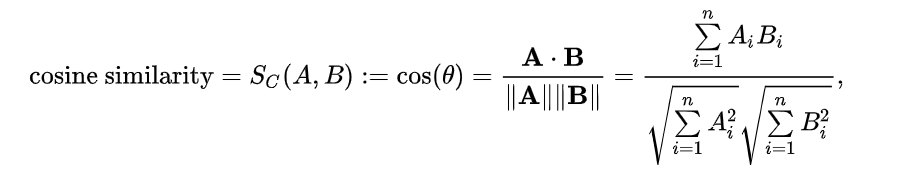

In [29]:
# Assuming you have a target_word_vector representing the input word vector
target_word_vector = vectors[word2int["career"]] 

# Normalize the target_word_vector
normalized_target = tf.nn.l2_normalize(target_word_vector, axis=0)

# Normalize all vectors
normalized_vectors = tf.nn.l2_normalize(vectors, axis=1)

# Calculate cosine similarity
cos_sim = tf.matmul(normalized_vectors, tf.expand_dims(normalized_target, axis=1))

# Run the session to get the cosine similarity values
cos_sim_values = sess.run(cos_sim)

# finding related words

after calculating the cossine similarity, we will find the most related word and make the cossine value always range between 0 and 1 by add it by 1 and divided it by 2

In [30]:
import numpy as np

int2word = {v: k for k, v in word2int.items()}

k = 100 # Number of similar words to display
most_similar_indices = np.argsort(-cos_sim_values[:, 0])[:k]  # Indices of most similar words

for idx in most_similar_indices:
    if idx in int2word:
        word = int2word[idx]
        similarity = cos_sim_values[idx, 0]
        similarity = (cos_sim_values[idx, 0] + 1) / 2
        print(f"Word: {word}, Cosine Similarity: {similarity}")

Word: career, Cosine Similarity: 0.9999999701976776
Word: anyother, Cosine Similarity: 0.9245655536651611
Word: behavi, Cosine Similarity: 0.9189665913581848
Word: accessiesrequired, Cosine Similarity: 0.9162114858627319
Word: held, Cosine Similarity: 0.8981815576553345
Word: perfm, Cosine Similarity: 0.8967413306236267
Word: assures, Cosine Similarity: 0.8903928399085999
Word: automotive, Cosine Similarity: 0.8856907486915588
Word: collabates, Cosine Similarity: 0.8823352456092834
Word: itsprograms, Cosine Similarity: 0.8817616999149323
Word: power, Cosine Similarity: 0.8808584213256836
Word: priitise, Cosine Similarity: 0.8787970542907715
Word: don, Cosine Similarity: 0.8773364126682281
Word: processingspreadsheet, Cosine Similarity: 0.8766614496707916
Word: progressively, Cosine Similarity: 0.8743759989738464
Word: fine, Cosine Similarity: 0.874084085226059
Word: programming, Cosine Similarity: 0.8719865679740906
Word: businessopptunities, Cosine Similarity: 0.8708740770816803
Word:

# Conclusion

To minimize the loss and improving accuracy, we can try several different approach by changing the batch size, the data point, embedding layer, and dataset that we use. We have approximately 9 million data after the preprocessing procces. But it is impossible to train the model with such a huge data because of the hardware limitation. 

Here, in training word2vec model, data relation or what we call semantic relation is very important and data characteristic need to be more specific for specific application and not to broad or general. Data needs to be clean and we need to make sure there's no stop words or other unwanted strings left. 

The problem here, we have 9 million data that we thought it already specific, but it turns out that the data we have not specific enough for job application model. The preproccesing also left us some unwanted strings and no white space for several words in data set. We try to use smaller data first and the model actually give descent prediction but when we increase the use of data for training, the model began to be more general and the prediction word is almost not having any similarity at all. So the use of specific dataset for specific application is very important.

# Download the trivial model extension

In [ ]:
import os

downloads_dir = os.path.expanduser("~") + "/Downloads"

# Define a filename for the model
model_filename = "word2vec_model.h5"

# Define the full path to save the model
model_path = os.path.join(downloads_dir, model_filename)

# Save the model
model.save(model_path)

print("Model saved successfully in the Downloads directory.")

# Convert Model to Tensor Flow Lite

In [35]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_model_path = os.path.join(downloads_dir, "word2vec_model.tflite")
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("Model converted to TensorFlow Lite format and saved successfully.")

INFO:tensorflow:Assets written to: C:\Users\jason\AppData\Local\Temp\tmpxinfch8g\assets
Model converted to TensorFlow Lite format and saved successfully.
